## Adding Additive Noise ##

### 

In [1]:
import numpy as np
from PIL import Image
import scipy.stats as ss

In [2]:
from matplotlib import pyplot as plt

### Uniform Noise ###

In [79]:
def uniform_noise(img,var):
    uniform_noise = np.random.randint(0,var,img.shape)
    new_image= img + uniform_noise
    new_image= np.clip(new_image,0,255)
    return new_image

### Gaussian ###

In [80]:
def gaussian_noise(img,var):
    mean = 0
    gaussian_noise= np.random.normal(mean,var,img.shape)
    gaussian_noise.round()
    new_image = img + gaussian_noise
    new_image = np.clip(new_image,0,255)
    return new_image

### Salt and Pepper ###

In [103]:
def salt_pepper_noise_not_sure(img,low,high):
    new_image= img
    for i,j in img.shape:
        if img[i][j] <= low:
            new_image[i][j]=0
        elif img[i][j] >= high:
            new_image[i][j] = 255
    return new_image

In [81]:
def salt_pepper_noise(img,density=None):
    
    # Check if the image is RGB and convert it to gray scale
    if len(img.shape)==3:
        gray_img= np.mean(img,axis=2)
    else: 
        gray_img= img
    
    rows, cols = gray_img.shape
    
    if density == None:
        density= np.random.uniform(0, 1)
    pixels_number= rows*cols
    noise_pixels= int(density * pixels_number)
    
    salt_noise= np.random.randint(0,noise_pixels)
    pepper_noise = noise_pixels - salt_noise
    
    for i in range(salt_noise):
        row = np.random.randint(0, rows-1)
        col = np.random.randint(0, cols-1)
        gray_img[row][col]=255
    for i in range(pepper_noise):
        row = np.random.randint(0, rows-1)
        col = np.random.randint(0, cols-1)
        gray_img[row][col]=0    
    
    return gray_img

### 

## Histogram and Distribution Curve ##

###### 

In [148]:
def histogram(img):
    if len(img.shape) == 3:
        return rgb_histogram(img)
    else:
        return gray_histogram(img)

In [149]:
def channel_histogram(img):
    rows,cols = img.shape
    hist= np.zeros(256)
    for row in range(rows):
        for col in range(cols):
            intensity = int(img[row][col])
            hist[intensity]+=1
    return hist

In [150]:
def gray_histogram(img):
    hist = channel_histogram(img)
    fig = plt.figure(figsize =(15, 7))
    plt.bar(range(256),hist,color='gray')
    plt.xticks(np.arange(0, 256, 10))
    plt.show;
    return hist

In [151]:
def rgb_histogram(img):
    r_hist = channel_histogram(img[:,:,0])
    g_hist = channel_histogram(img[:,:,1])
    b_hist = channel_histogram(img[:,:,2])
    hist_dict= {}
    hist_dict['R']= r_hist
    hist_dict['G']= g_hist
    hist_dict['B']= b_hist
    
    fig, ax = plt.subplots(nrows=3, ncols=1)
    ax[0].bar(range(256),r_hist,color='red')
    ax[1].bar(range(256),g_hist,color='green')
    ax[2].bar(range(256),b_hist,color='blue')
    fig.suptitle("RGB Distribution")
    plt.show;
    
    return hist_dict


## 

### Tests ###

### 

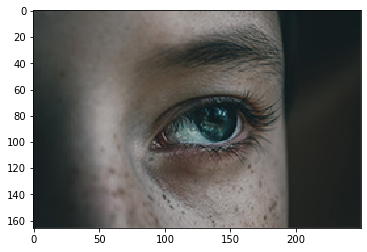

In [113]:
im = np.array(Image.open('./imgs/250x166/1.jpg'))

plt.imshow(im,vmin=0,vmax=255,interpolation='nearest')

(166, 250)
(166, 250, 3)
2
3


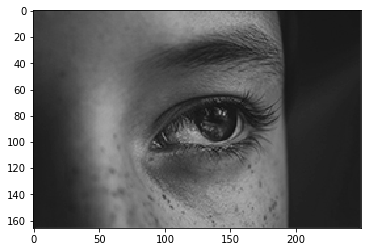

In [6]:
gray_np = np.mean(im, axis = 2)
print(gray_np.shape)
print(im.shape)
print(len(gray_np.shape))
print(len(im.shape))
plt.imshow(gray_np,cmap='gray',vmin=0,vmax=255,interpolation='nearest')

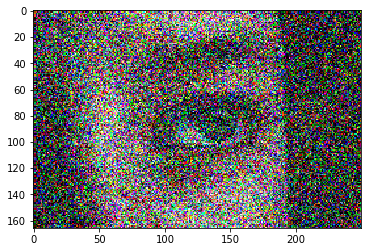

In [96]:
plt.imshow(new_image.astype('uint8'), interpolation  = 'nearest')

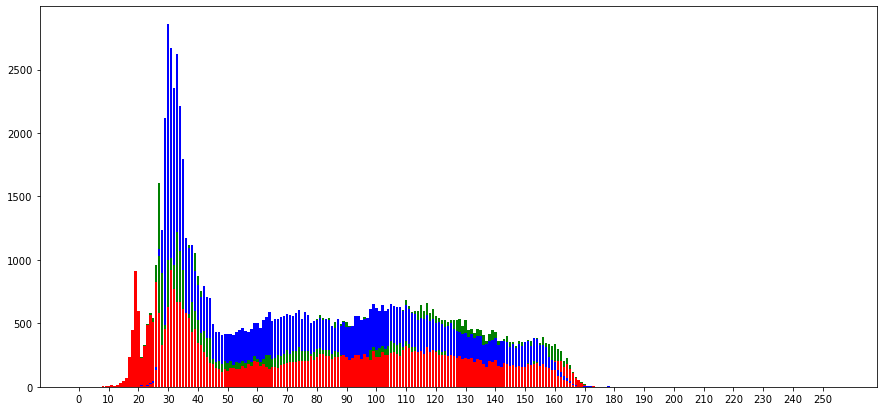

In [47]:
img=im

rows,cols,channels = img.shape
r_hist = channel_histogram(img[:,:,0])
g_hist = channel_histogram(img[:,:,1])
b_hist = channel_histogram(img[:,:,2])
hist_dict= {}
hist_dict['R']= r_hist
hist_dict['G']= g_hist
hist_dict['B']= b_hist
fig = plt.subplots(figsize =(15, 7))
p1= plt.bar(range(256),r_hist,color='red')
p2= plt.bar(range(256),g_hist,color='green',bottom= r_hist)
p3= plt.bar(range(256),b_hist,color='blue',bottom= g_hist)

plt.xticks(np.arange(0, 256, 10))
plt.show;



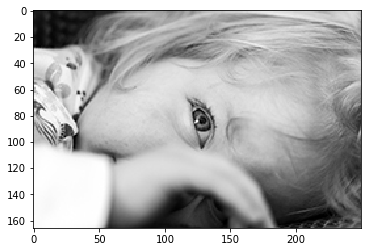

In [77]:
im2 = np.array(Image.open('./imgs/250x166/2.jpg'))

plt.imshow(im2,vmin=0,vmax=255,interpolation='nearest')

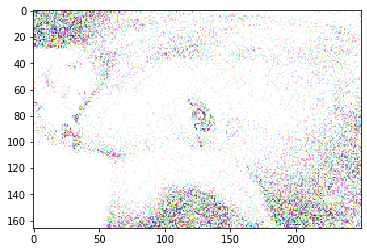

In [97]:
plt.imshow(uniform_noise(im2,400),vmin=0,vmax=255,interpolation='nearest',cmap='gray');

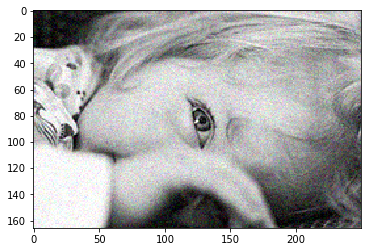

In [146]:
plt.imshow(gaussian_noise(im2,15).astype('uint8'),vmin=0,vmax=255,interpolation='nearest',cmap='gray');

In [135]:
gaussian_test= np.random.normal(0,0.1,im2.shape)
gaussian_test

array([[[ 0.03129137,  0.05346767,  0.04521851],
        [-0.11434524,  0.02217733, -0.00654243],
        [ 0.04493352,  0.03381908,  0.10374948],
        ...,
        [ 0.05957963, -0.02012659, -0.0558094 ],
        [ 0.03750656,  0.2240331 ,  0.14832915],
        [ 0.24415562,  0.07999665, -0.13514782]],

       [[ 0.0366345 ,  0.00776873,  0.0068156 ],
        [ 0.11471757, -0.08234195, -0.18470963],
        [-0.16730485,  0.01678635,  0.13178592],
        ...,
        [-0.02355495,  0.07522137,  0.06730668],
        [ 0.11014815,  0.16692395,  0.13741072],
        [-0.09352465, -0.03093361, -0.19577158]],

       [[ 0.1556284 , -0.01421771,  0.05087608],
        [-0.12744678,  0.10006502, -0.07165962],
        [-0.00589328,  0.14235574,  0.05289655],
        ...,
        [ 0.10335927, -0.06424631, -0.03752891],
        [ 0.00977612, -0.07828773, -0.1310485 ],
        [-0.05534835, -0.02923643, -0.07326576]],

       ...,

       [[-0.15047142, -0.06591049,  0.18279898],
        [-0

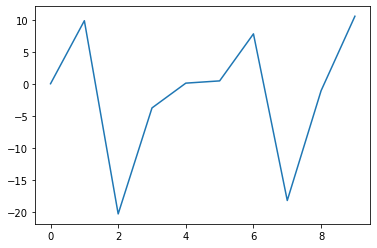

In [117]:
plt.plot(np.random.normal(0,10,10))
plt.show();

In [129]:
s=np.random.normal(0,0.1,100)

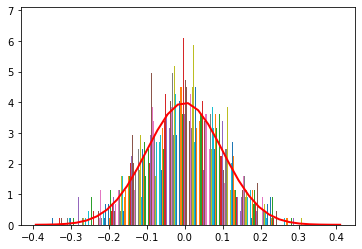

In [137]:
count, bins, ignored = plt.hist(gaussian_test[:,:,2], 30, density=True)
plt.plot(bins, 1/(0.1* np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 0)**2 / (2 * 0.1**2) ),
         linewidth=2, color='r')
plt.show()

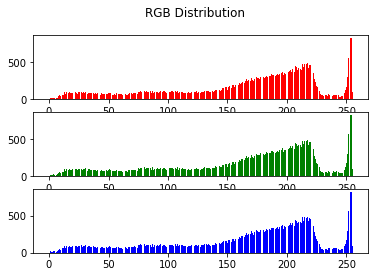

In [153]:
histogram(im2);

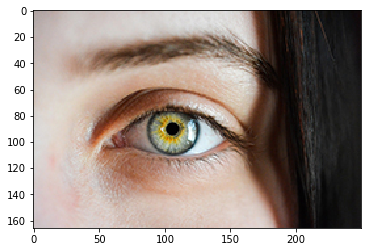

In [155]:
im3 = np.array(Image.open('./imgs/250x166/3.jpg'))

plt.imshow(im3,vmin=0,vmax=255,interpolation='nearest');

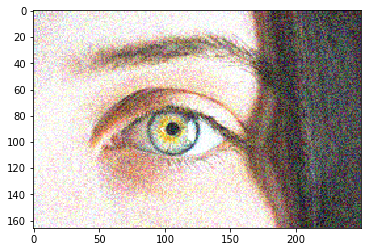

In [158]:
plt.imshow(uniform_noise(im3,100).astype('uint8'),vmin=0,vmax=255,interpolation='nearest');

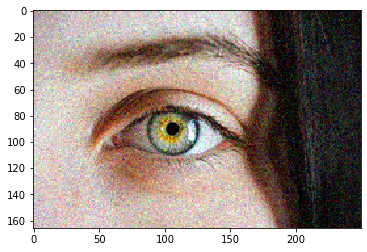

In [161]:
plt.imshow(gaussian_noise(im3,20).astype('uint8'),vmin=0,vmax=255,interpolation='nearest');

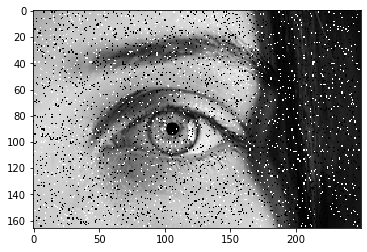

In [168]:
plt.imshow(salt_pepper_noise(im3,0.1).astype('uint8'),cmap='gray',vmin=0,vmax=255,interpolation='nearest');

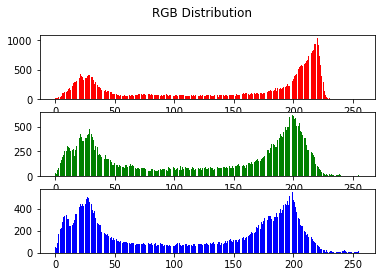

In [169]:
histogram(im3);

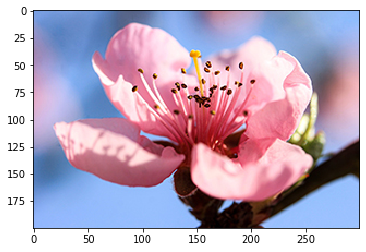

In [172]:
im4 = np.array(Image.open('./imgs/300x200/1.jpg'))

plt.imshow(im4,vmin=0,vmax=255,interpolation='nearest');

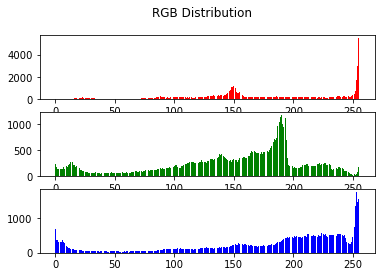

In [173]:
histogram(im4);